# Supervised versus Un-supervised learning

In a nutshell:


- *Unsupervised learning*: Identifying the structure in unlabeled data

  - *Dimensionality reduction*: Detecting and identifying lower-dimensional structure in higher-dimensional data
  - *Clustering*: Detecting and Identifying distinct groups in the data
  
  
- *Supervised learning*: Predicting labels based on labeled training data

  - *Classification*: Predicting labels as two or more discrete categories
  - *Regression*: Predicting continuous labels

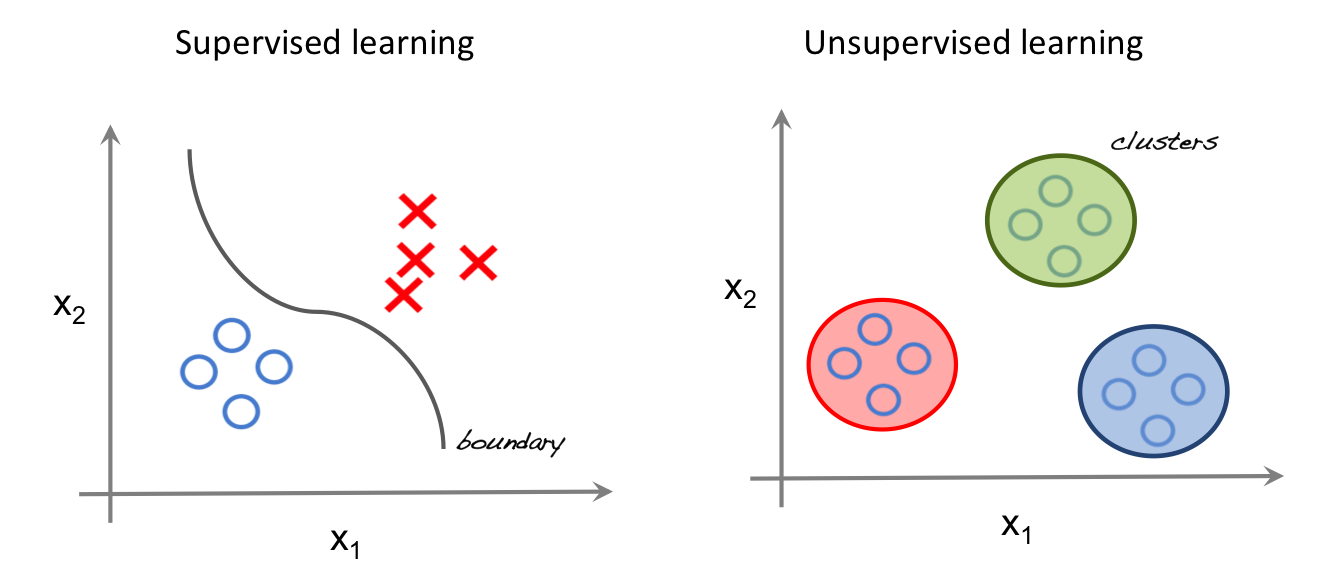

# k-Means Clustering

k-Means two main assumptions:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.


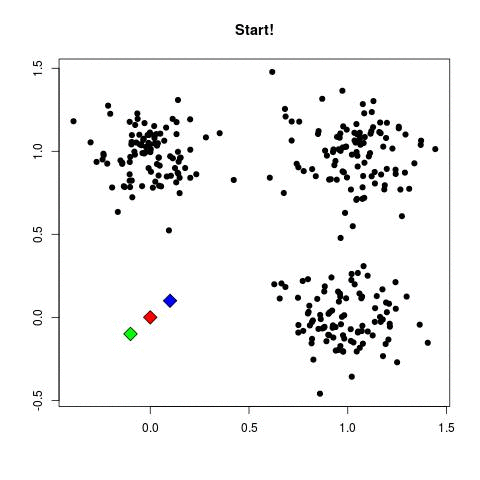

In [ ]:
from IPython.display import IFrame
IFrame(src="https://shiny.rstudio.com/gallery/kmeans-example.html", width='75%', height='400px')

## k-Means using Scikit

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


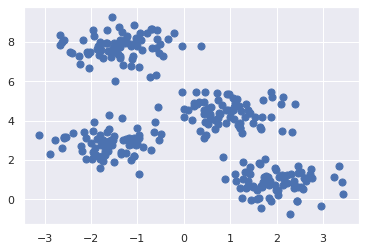

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
y_kmeans[200]

3

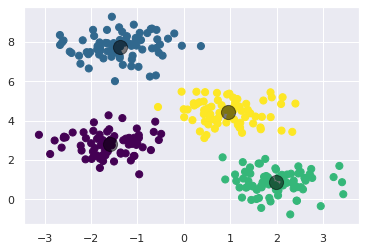

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## k-Means Algorithm is nothing but Expectation–Maximization

In short, the expectation–maximization approach here consists of the following procedure:

1. Guess some cluster centers
2. Repeat until converged
   1. *E-Step*: assign points to the nearest cluster center
   2. *M-Step*: set the cluster centers to the mean 


The literature about this algorithm is vast, but can be summarized as follows: under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics.


The following is a very basic implementation of k-Means:

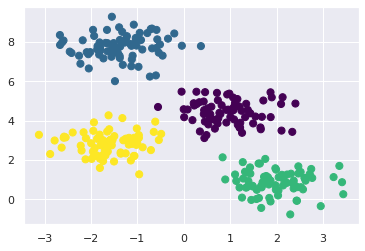

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Most well-tested implementations will do a bit more than this under the hood, but the preceding function gives the gist of the expectation–maximization approach.

### Caveats of expectation–maximization and k-Means

There are a few issues to be aware of when using the expectation–maximization algorithm.

#### (1) There is no guarantee to achieve the global solution


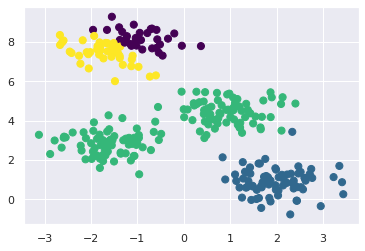

In [ ]:
centers, labels = find_clusters(X, 4, rseed=3)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

#### Solution

it is common for the algorithm to be run for multiple starting guesses, as indeed Scikit-Learn does by default (set by the ``n_init`` parameter, which defaults to 10).

#### (2) The number of clusters must be selected beforehand

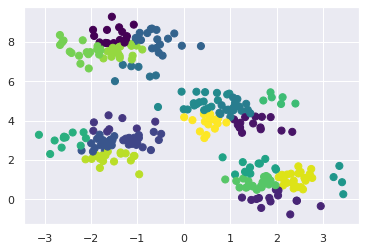

In [ ]:
n_clusters = 20
labels = KMeans(n_clusters, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

#### Solution
In order to address this issue, we may use *silhouette analysis* to study the separation distance between the resulting clusters.

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(X, labels)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is:", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, labels)

For n_clusters = 20 The average silhouette_score is: 0.3562042920720663


In [ ]:
sample_silhouette_values

array([ 0.39281124,  0.6239797 ,  0.35202161,  0.22528322,  0.53318961,
        0.25035609,  0.44323111,  0.28333973,  0.47381508,  0.24584187,
        0.6208769 ,  0.18700908,  0.57340401,  0.24405388,  0.25949951,
        0.59122577,  0.65632751,  0.3330393 ,  0.59182766,  0.24343567,
        0.39438227,  0.20732618,  0.04893802,  0.42118866,  0.41792632,
        0.19632467,  0.58471195,  0.01741783,  0.27339302,  0.49225578,
        0.40969297,  0.33034241,  0.26781706,  0.37161201,  0.03592744,
        0.49683505,  0.31661009,  0.40960838,  0.13140337,  0.60551804,
        0.44428117,  0.35697058,  0.43889097,  0.11335277,  0.07898501,
        0.56029109,  0.23066766,  0.46220727,  0.5891952 ,  0.07962187,
       -0.05348783,  0.4570485 ,  0.21382016,  0.60823321,  0.48661958,
        0.53077086,  0.42370885,  0.42225377, -0.0412098 ,  0.50947283,
        0.42700606,  0.19445172,  0.33825277,  0.64692352, -0.13444323,
        0.39105377,  0.50769535,  0.56556627,  0.46250078,  0.16

#### (3) k-Means is limited to linear cluster boundaries

In [ ]:
from sklearn.datasets import make_moons
moons, y = make_moons(200, noise=.05, random_state=0)

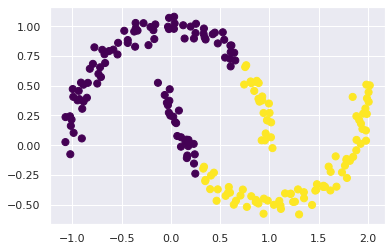

In [ ]:
labels = KMeans(2, random_state=0).fit_predict(moons)
plt.scatter(moons[:, 0], moons[:, 1], c=labels,
            s=50, cmap='viridis');

#### Solution

Projecting the space to higher dimension. 

One version of this kernelized k-means is implemented in Scikit-Learn within the _SpectralClustering_ estimator. It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm:

## Spectral Clustering

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


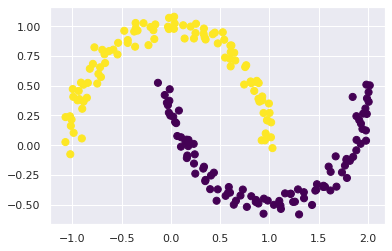

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(moons)
plt.scatter(moons[:, 0], moons[:, 1], c=labels,
            s=50, cmap='viridis');

We see that with this kernel transform approach, the kernelized *k*-means is able to find the more complicated nonlinear boundaries between clusters.

#### (4) k-Means can be slow for large numbers of samples
Because each iteration of *k*-means must access every point in the dataset, the algorithm can be relatively slow as the number of samples grows.
You might wonder if this requirement to use all data at each iteration can be relaxed; for example, you might just use a subset of the data to update the cluster centers at each step.
This is the idea behind batch-based *k*-means algorithms, one form of which is implemented in ``sklearn.cluster.MiniBatchKMeans``.
The interface for this is the same as for standard ``KMeans``; we will see an example of its use as we continue our discussion.

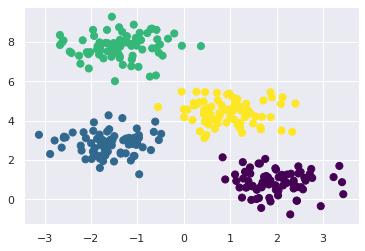

In [ ]:
n_clusters = 4
from sklearn.cluster import MiniBatchKMeans
labels = MiniBatchKMeans(n_clusters, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');